Note my python version:

In [1]:
import sys
print(sys.version)

3.6.7 (default, Oct 22 2018, 11:32:17) 
[GCC 8.2.0]


Packages you'll need:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic

# Scatter plot example (mtcars dataset)

Read mtcars dataset:

In [3]:
mtcars = pd.read_csv('data/mtcars.csv')

In [4]:
mtcars.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


Function to permute a specific column of the dataset:

In [5]:
def permute_col(df, colname, sample_num=0, permute=True):
    df2 = df.copy()
    df2['.sample'] = sample_num
    if permute:
        df2[colname] = np.random.permutation(df2[colname])
    return df2

In [6]:
permute_col(mtcars, 'hp').head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,.sample
0,21.0,6,160.0,180,3.90,2.620,16.46,0,1,4,4,0
1,21.0,6,160.0,62,3.90,2.875,17.02,0,1,4,4,0
2,22.8,4,108.0,335,3.85,2.320,18.61,1,1,4,1,0
3,21.4,6,258.0,109,3.08,3.215,19.44,1,0,3,1,0
4,18.7,8,360.0,97,3.15,3.440,17.02,0,0,3,2,0


Function to create a lineup dataset, i.e. the dataset replicated n times, each with a specific column permuted:

In [7]:
def lineup(df, colname, n=20):
    permuted_dfs = [permute_col(df, colname, i) for i in range(n)]
    orig_loc = np.random.choice(n)
    orig_df = permute_col(df, colname, orig_loc, permute=False)
    permuted_dfs[orig_loc] = orig_df
    return pd.concat(permuted_dfs), orig_loc

In [8]:
lineup_mtcars, orig_loc = lineup(mtcars, 'hp')

In [9]:
lineup_mtcars['.sample'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

In [10]:
orig_loc

11

In [11]:
lineup_mtcars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 640 entries, 0 to 31
Data columns (total 12 columns):
mpg        640 non-null float64
cyl        640 non-null int64
disp       640 non-null float64
hp         640 non-null int64
drat       640 non-null float64
wt         640 non-null float64
qsec       640 non-null float64
vs         640 non-null int64
am         640 non-null int64
gear       640 non-null int64
carb       640 non-null int64
.sample    640 non-null int64
dtypes: float64(5), int64(7)
memory usage: 65.0 KB


See that original mtcars dataset is in the right ".sample" place:

In [12]:
mtcars.equals(lineup_mtcars[lineup_mtcars['.sample'] == orig_loc].drop(columns=['.sample']))

True

Now plot the lineup:

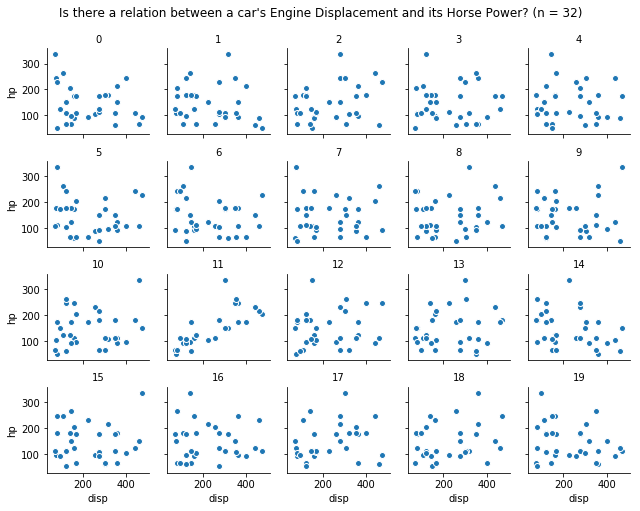

In [13]:
g = sns.FacetGrid(lineup_mtcars, col='.sample', col_wrap=5, height=1.8)
g = g.map(plt.scatter, 'disp', 'hp', edgecolor='w').set_titles('{col_name}')
g.fig.suptitle('Is there a relation between a car\'s Engine Displacement and its Horse Power? (n = 32)')
plt.subplots_adjust(top=0.9)

# Mosaic plot (fly dataset)

In [14]:
fly = pd.read_csv('data/fly.csv')
fly.head()

,ID,FlightFreq,DoYouRecline,Height,Child18,Seats3_2Arms,Seats2_1Arm,WhoControlsWindowShade,RudeToMoveToUnsoldSeat,RudeToTalkToNeighbor,...,RudeToWakeNeighborForWalk,RudeToBringBaby,RudeToBringUnrulyChild,UseElectronicsDuringTakeoff,HaveYouSmoked,Gender,Age,HouseholdIncome,Education,Region
0,3436139758,Once a year or less,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3434278696,Once a year or less,About half the time,"6'3""",Yes,The arm rests should be shared,The arm rests should be shared,Everyone in the row should have some say,"No, not rude at all","No, not at all rude",...,"No, not at all rude",No,"No, not at all rude",No,No,Male,30-44,NaN,Graduate degree,Pacific
2,3434275578,Once a year or less,Usually,"5'8""",No,Whoever puts their arm on the arm rest first,The arm rests should be shared,The person in the window seat should have excl...,"No, not rude at all","No, not at all rude",...,"Yes, somewhat rude",Somewhat,"Yes, very rude",No,No,Male,30-44,"$100,000 - $149,999",Bachelor degree,Pacific
3,3434268208,Once a year or less,Always,"5'11""",No,The arm rests should be shared,The arm rests should be shared,Everyone in the row should have some say,"No, not rude at all","No, not at all rude",...,"Yes, somewhat rude",Somewhat,"Yes, very rude",No,No,Male,30-44,"$0 - $24,999",Bachelor degree,Pacific
4,3434250245,Once a month or less,About half the time,"5'7""",No,The person in the middle seat gets both arm rests,The person in aisle,Everyone in the row should have some say,"No, not rude at all","No, not at all rude",...,"Yes, somewhat rude",Somewhat,"Yes, very rude",Yes,No,Male,30-44,"$50,000 - $99,999",Bachelor degree,Pacific


In [15]:
lineup_fly, orig_loc = lineup(fly, 'Gender')
lineup_fly.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20800 entries, 0 to 1039
Data columns (total 28 columns):
ID                               20800 non-null int64
FlightFreq                       20800 non-null object
DoYouRecline                     17160 non-null object
Height                           17160 non-null object
Child18                          17020 non-null object
Seats3_2Arms                     17120 non-null object
Seats2_1Arm                      17120 non-null object
WhoControlsWindowShade           17120 non-null object
RudeToMoveToUnsoldSeat           17100 non-null object
RudeToTalkToNeighbor             17100 non-null object
SixHrFlightRudeToLeaveSeat       17100 non-null object
RecliningObligationToBehind      17080 non-null object
RudeToRecline                    17080 non-null object
EliminateReclining               17020 non-null object
RudeToSwitchSeatsForFriends      17000 non-null object
RudeToSwitchSeatsForFamily       17000 non-null object
RudeToWakeNei

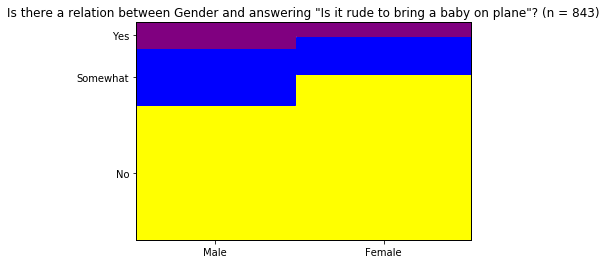

In [16]:
props = {}
for x in ['Female', 'Male']:
    for y, col in {'Yes': 'purple', 'Somewhat': 'blue', 'No': 'yellow'}.items():
        props[(x, y)] ={'color': col}

mosaic(fly, ['Gender', 'RudeToBringBaby'],
       title='Is there a relation between Gender and answering "Is it rude to bring a baby on plane"? (n = 843)',
       labelizer=lambda k: '',
       properties=props)
plt.show()

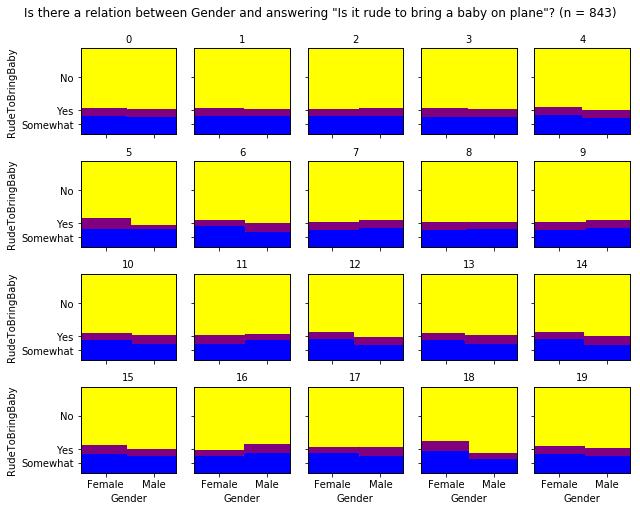

In [17]:
def fly_mosaic(*args,**kwargs):
    mosaic(kwargs['data'], list(args),
           labelizer=lambda k: '',
           properties=props,
           ax=plt.gca())

g = sns.FacetGrid(lineup_fly, col='.sample', col_wrap=5, height=1.8)
g = g.map_dataframe(fly_mosaic, 'Gender', 'RudeToBringBaby').set_titles('{col_name}')
g.fig.suptitle('Is there a relation between Gender and answering "Is it rude to bring a baby on plane"? (n = 843)')
plt.subplots_adjust(top=0.9)

In [18]:
orig_loc

18

# Swarm plot (role_after_char_end dataset)

In [19]:
role_after_char_end = pd.read_csv('data/role_after_char_end.csv')
role_after_char_end.head()

,Gender,n_roles
0,Male,0
1,Female,1
2,Female,2
3,Female,0
4,Male,9


In [20]:
lineup_role, orig_loc = lineup(role_after_char_end, 'Gender')
lineup_role.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2580 entries, 0 to 128
Data columns (total 3 columns):
Gender     2580 non-null object
n_roles    2580 non-null int64
.sample    2580 non-null int64
dtypes: int64(2), object(1)
memory usage: 80.6+ KB


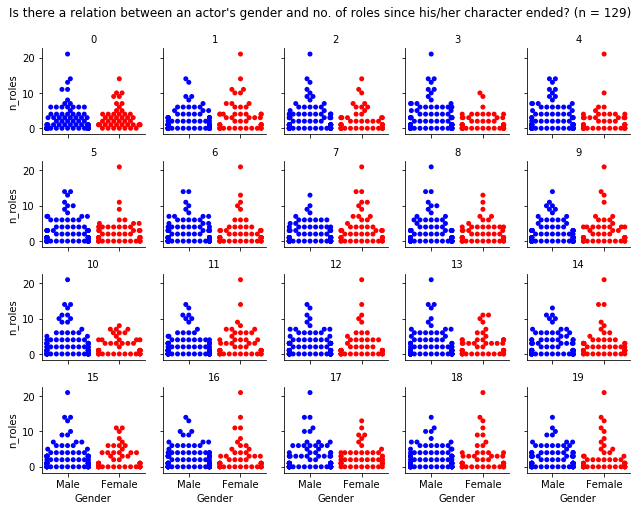

In [21]:
g = sns.FacetGrid(lineup_role, col='.sample', col_wrap=5, height=1.8)
g = g.map(sns.swarmplot, 'Gender', 'n_roles', edgecolor='w', order=['Male', 'Female'], color='Gender', palette=['blue', 'red']).set_titles('{col_name}')
g.fig.suptitle('Is there a relation between an actor\'s gender and no. of roles since his/her character ended? (n = 129)')
plt.subplots_adjust(top=0.9)

In [22]:
orig_loc

4